In [1]:
%%capture
%run data_analysis.ipynb

In [2]:
import warnings
warnings.filterwarnings('ignore')
from datetime import timedelta, date

## Features Engineering

Idées 

* Nombre d'activités dernier 30 jours avant aujourd'hui
* Ecart de jour depuis la derniere activité ou en heure ( récupération ? ) 
* Moyenne 30 derniers jours speed , heart_rate , watts , calories , suffer_score ? 
* Home Trainer ou pas 
* Heure de la journée de début ? =)
* Mois de l'année ( meilleure performance , hiver été etc... ) 

**Temps d'activité ( min )  dernier 30 jours avant aujourd'hui**

Erreur si on fait plusieurs activitées le meme jour... mais cas marginal

In [5]:
def time_activities_last_30d(segments, activities):
    time_activities_last_30d = []
    for date in segments['start_date']:
        end_date = date - timedelta(days=1)
        start_date = end_date - timedelta(days=30)
        result = activities[activities['start_date'].between(start_date,end_date)]
        time_activities = round((result['elapsed_time'].sum()/60),2)
        time_activities_last_30d.append(time_activities)
    segments['time_activities_last_30d'] = time_activities_last_30d
    return segments

In [6]:
segments = time_activities_last_30d(segments_df, activities_df)

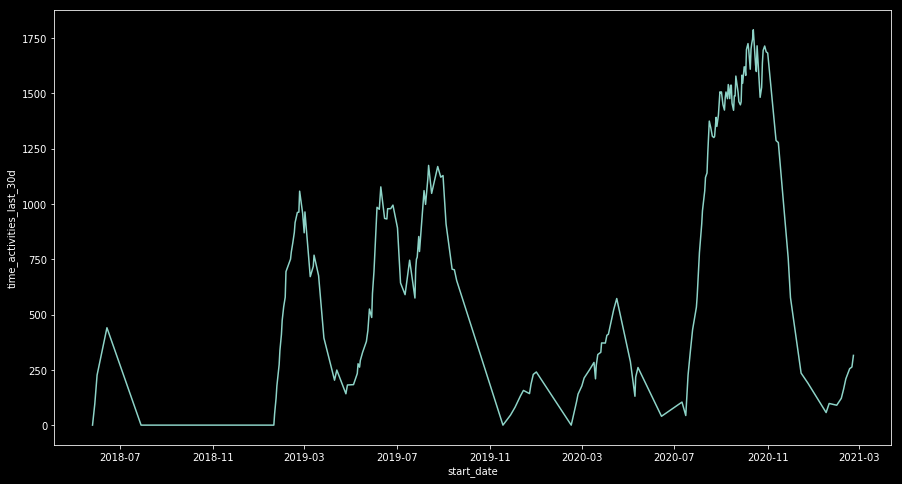

In [7]:
plt.style.use('dark_background')
plt.figure(figsize=(15,8))
plt.plot(segments_df['start_date'],segments_df['time_activities_last_30d'])
plt.xlabel('start_date')
plt.ylabel('time_activities_last_30d')
plt.show()

In [8]:
segments_df.head(5)

,id,activity_id,athlete_id,name,type,elapsed_time,moving_time,distance,average_cadence,average_watts,average_grade,maximum_grade,climb_category,average_heart_rate,max_heart_rate,start_time,start_date,time_activities_last_30d
0,24674235,4831255939,10944546,Champs-Élysées,VirtualRide,653,653,6623.10,82.3,202.8,0.0,4.6,0,161.2,170.0,18:46:25,2021-02-22,315.25
1,27141377,4831057316,10944546,Epic KOM - Start to Bypass Intersection (Zwift...,VirtualRide,424,424,1882.50,77.3,201.2,3.8,47.8,0,157.9,164.0,18:19:40,2021-02-22,315.25
2,22501195,4818094466,10944546,Villenave-Technopole,Ride,789,789,5100.50,NaN,108.0,0.5,6.4,0,169.0,184.0,14:39:32,2021-02-20,262.78
3,3566434,4818094466,10944546,Col du Chateau d'eau,Ride,217,217,1190.37,NaN,141.8,2.1,7.3,0,170.7,183.0,14:40:47,2021-02-20,262.78
4,20598228,4818094466,10944546,Col du chateau d'eau court,Ride,151,151,745.40,NaN,165.4,2.8,5.5,0,177.5,183.0,14:42:02,2021-02-20,262.78


**Home Trainer ou pas**

In [10]:
segments_df = pd.get_dummies(segments_df, columns=['type'], drop_first=True)
segments_df = segments_df.rename(columns={'type_VirtualRide': 'type_virtualride'})
segments_df.head(5)

,id,activity_id,athlete_id,name,elapsed_time,moving_time,distance,average_cadence,average_watts,average_grade,maximum_grade,climb_category,average_heart_rate,max_heart_rate,start_time,start_date,time_activities_last_30d,type_virtualride
0,24674235,4831255939,10944546,Champs-Élysées,653,653,6623.10,82.3,202.8,0.0,4.6,0,161.2,170.0,18:46:25,2021-02-22,315.25,1
1,27141377,4831057316,10944546,Epic KOM - Start to Bypass Intersection (Zwift...,424,424,1882.50,77.3,201.2,3.8,47.8,0,157.9,164.0,18:19:40,2021-02-22,315.25,1
2,22501195,4818094466,10944546,Villenave-Technopole,789,789,5100.50,NaN,108.0,0.5,6.4,0,169.0,184.0,14:39:32,2021-02-20,262.78,0
3,3566434,4818094466,10944546,Col du Chateau d'eau,217,217,1190.37,NaN,141.8,2.1,7.3,0,170.7,183.0,14:40:47,2021-02-20,262.78,0
4,20598228,4818094466,10944546,Col du chateau d'eau court,151,151,745.40,NaN,165.4,2.8,5.5,0,177.5,183.0,14:42:02,2021-02-20,262.78,0


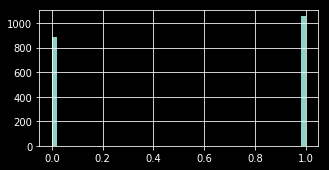

In [11]:
segments_df['type_virtualride'].hist(bins=50, figsize=(5,2.5))
plt.show()

### Récupération ( temps en minutes depuis la derniere activité ) 

In [9]:
days_since_last_activity = []
for activity_id in segments_df['activity_id']:
    try:
        index_activity = activities_df.loc[activities_df['id'] == activity_id].index
        result = activities_df.loc[index_activity]['start_date'].values[0] - activities_df.loc[index_activity+1]['start_date'].values[0]
        result = result.days
    except KeyError:
        result = 0
        
    days_since_last_activity.append(result)
days_since_last_activity

[0,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 4,
 24,
 24,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 14,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 10,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,

In [ ]:
segments_df['days_since_last_activity'] = days_since_last_activity
segments_df

**Mean Climb Category Last30D**

In [12]:
def average_climbcat_last_30d(segments):
    average_climbcat_last_30d = []
    for date in segments['start_date']:
        end_date = date - timedelta(days=1)
        start_date = end_date - timedelta(days=30)
        result = segments[segments['start_date'].between(start_date,end_date)]['climb_category'].mean()
        if np.isnan(result):
            result=0
        average_climbcat_last_30d.append(round(result,2))
    segments['average_climbcat_last_30d'] = average_climbcat_last_30d
    return segments

In [13]:
segments = average_climbcat_last_30d(segments_df)

In [14]:
segments.head(5)

,id,activity_id,athlete_id,name,elapsed_time,moving_time,distance,average_cadence,average_watts,average_grade,maximum_grade,climb_category,average_heart_rate,max_heart_rate,start_time,start_date,time_activities_last_30d,type_virtualride,average_climbcat_last_30d
0,24674235,4831255939,10944546,Champs-Élysées,653,653,6623.10,82.3,202.8,0.0,4.6,0,161.2,170.0,18:46:25,2021-02-22,315.25,1,0.06
1,27141377,4831057316,10944546,Epic KOM - Start to Bypass Intersection (Zwift...,424,424,1882.50,77.3,201.2,3.8,47.8,0,157.9,164.0,18:19:40,2021-02-22,315.25,1,0.06
2,22501195,4818094466,10944546,Villenave-Technopole,789,789,5100.50,NaN,108.0,0.5,6.4,0,169.0,184.0,14:39:32,2021-02-20,262.78,0,0.15
3,3566434,4818094466,10944546,Col du Chateau d'eau,217,217,1190.37,NaN,141.8,2.1,7.3,0,170.7,183.0,14:40:47,2021-02-20,262.78,0,0.15
4,20598228,4818094466,10944546,Col du chateau d'eau court,151,151,745.40,NaN,165.4,2.8,5.5,0,177.5,183.0,14:42:02,2021-02-20,262.78,0,0.15


**speed average last 30d**

In [15]:
activities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    214 non-null    int64  
 1   athlete_id            214 non-null    int64  
 2   name                  214 non-null    object 
 3   distance              214 non-null    float64
 4   moving_time           214 non-null    int64  
 5   elapsed_time          214 non-null    int64  
 6   total_elevation_gain  214 non-null    float64
 7   type                  214 non-null    object 
 8   average_speed         214 non-null    float64
 9   average_cadence       183 non-null    float64
 10  average_watts         214 non-null    float64
 11  max_watts             183 non-null    float64
 12  suffer_score          55 non-null     float64
 13  calories              214 non-null    float64
 14  average_heart_rate    55 non-null     float64
 15  max_heart_rate        5

In [16]:
activities_df['average_speed']

0      9.881
1      6.460
2      7.233
3      7.870
4      7.553
       ...  
209    6.871
210    6.758
211    6.616
212    6.726
213    6.878
Name: average_speed, Length: 214, dtype: float64

In [17]:
def average_speed_last_30d(segments, activities):
    average_speed_last_30d = []
    for date in segments['start_date']:
        end_date = date - timedelta(days=1)
        start_date = end_date - timedelta(days=30)
        result = activities[activities['start_date'].between(start_date,end_date)]['average_speed'].mean()
        if np.isnan(result):
            result=0
        average_speed_last_30d.append(round(result,2))
    segments['average_speed_last_30d'] = average_speed_last_30d
    return segments

In [18]:
segments = average_speed_last_30d(segments_df, activities_df)

In [19]:
segments.head(5)

,id,activity_id,athlete_id,name,elapsed_time,moving_time,distance,average_cadence,average_watts,average_grade,maximum_grade,climb_category,average_heart_rate,max_heart_rate,start_time,start_date,time_activities_last_30d,type_virtualride,average_climbcat_last_30d,average_speed_last_30d
0,24674235,4831255939,10944546,Champs-Élysées,653,653,6623.10,82.3,202.8,0.0,4.6,0,161.2,170.0,18:46:25,2021-02-22,315.25,1,0.06,7.76
1,27141377,4831057316,10944546,Epic KOM - Start to Bypass Intersection (Zwift...,424,424,1882.50,77.3,201.2,3.8,47.8,0,157.9,164.0,18:19:40,2021-02-22,315.25,1,0.06,7.76
2,22501195,4818094466,10944546,Villenave-Technopole,789,789,5100.50,NaN,108.0,0.5,6.4,0,169.0,184.0,14:39:32,2021-02-20,262.78,0,0.15,7.69
3,3566434,4818094466,10944546,Col du Chateau d'eau,217,217,1190.37,NaN,141.8,2.1,7.3,0,170.7,183.0,14:40:47,2021-02-20,262.78,0,0.15,7.69
4,20598228,4818094466,10944546,Col du chateau d'eau court,151,151,745.40,NaN,165.4,2.8,5.5,0,177.5,183.0,14:42:02,2021-02-20,262.78,0,0.15,7.69
